# Parking Meter Data

### Read-in the parking meter transactions (per month in 2015) and parking meter locations (from SD data portal)
### Count the number of transactions and poles
### For each pole, find census tract based on long/lat and sum up all transactions at that pole to get total for 2015
### Add totals for each pole in a given census tract
### Output  each census_tract and total_amount (total transaction amount for 2015) to data_final/sd_parking_meters_cleaned.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in trasnaction info
trans = pd.read_csv('data/sd_parking_meter_transactions_2015_by_month.csv')
# count how many transactions we got
trans.pole_id.count()

51695

In [15]:
trans

,pole_id,meter_type,month,sum_trans_amt,num_trans <- n()
0,1-1004,SS,Jan,19855,255
1,1-1004,SS,Feb,16930,209
2,1-1004,SS,Mar,22070,273
3,1-1004,SS,Apr,19430,255
4,1-1004,SS,May,17335,204
5,1-1004,SS,Jun,18850,213
6,1-1004,SS,Jul,23080,259
7,1-1004,SS,Aug,18600,238
8,1-1004,SS,Sep,24365,262
9,1-1004,SS,Oct,21265,226


In [3]:
# read in parking meter info
meter = pd.read_csv('data/sd_parking_meter_locations.csv')
# count how many poles we got
meter.pole.count()

4653

In [4]:
meter

,zone,area,sub_area,pole,config_code,config_name,longitude,latitude
0,City,Barrio Logan,2900 ADDISON ST,ADN-2912,9116,30 Min Max $1.25 HR 8am-6pm Mon-Sat,-117.230904,32.721670
1,City,Barrio Logan,2900 ADDISON ST,ADN-2914,9116,30 Min Max $1.25 HR 8am-6pm Mon-Sat,-117.230913,32.721575
2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352
4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155
5,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1013,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145405,32.700107
6,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1015,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145539,32.699987
7,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1017,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145540,32.699985
8,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1019,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145545,32.699981
9,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1103,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699544


In [5]:
# start census geocode
from censusgeocode import CensusGeocode
cg = CensusGeocode()

In [6]:
# initialize list of total amounts
total_amount_list = []
tract_list = []
# go through each meter
for row in meter.itertuples():
    # calculate total amount in 2015 for current parking meter
    total_amount = sum(trans[row[4]==trans.pole_id].sum_trans_amt)
    # add new total to list of totals
    total_amount_list.append(total_amount)
    
    # save long/lat
    lon = row[7]
    lat = row[8]
    # get census tract
    n_attempts = 0
    address_info = []
    while True:
        try:
            n_attempts += 1
            # get position info
            address_info = cg.coordinates(x=lon,y=lat)
            break
        except:
            if n_attempts >= 5:
                print 'bad in try: '+row[4]+','+str(lon)+','+str(lat)
                break

    if len(address_info)!=0:
        try:
            tract = str(address_info[0]['Census Tracts'][0]['TRACT'])
            # save tract
            tract_list.append(tract)
        except:
            try:
                tract = str(address_info[0]['2010 Census Blocks'][0]['TRACT'])
                # save tract
                tract_list.append(tract)
            except:
                print row[4]
                # save bad tract
                tract_list.append('-1')
    else:
        print row[4]
        # save bad tract
        tract_list.append('-1')
    
    if row[0]%100 == 0:
        print row[0]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
5-207
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600


In [7]:
# start file to hold parking meter data
f = open('data_final/sd_parking_meters_cleaned.csv', 'w')
# print header
f.write('census_tract,total_amount\n')
f.close()

In [8]:
f = open('data_final/sd_parking_meters_cleaned.csv', 'a')
# go through each census tract and add up all parking meters in that tract
tract_list_uniq = list(set(tract_list))
totals_list = []
for tract in tract_list_uniq:
    totals = sum([total_amount_list[i] for i, x in enumerate(tract_list) if x == tract])
    totals_list.append(totals)
    f.write(tract+','+str(totals)+'\n')
f.close()

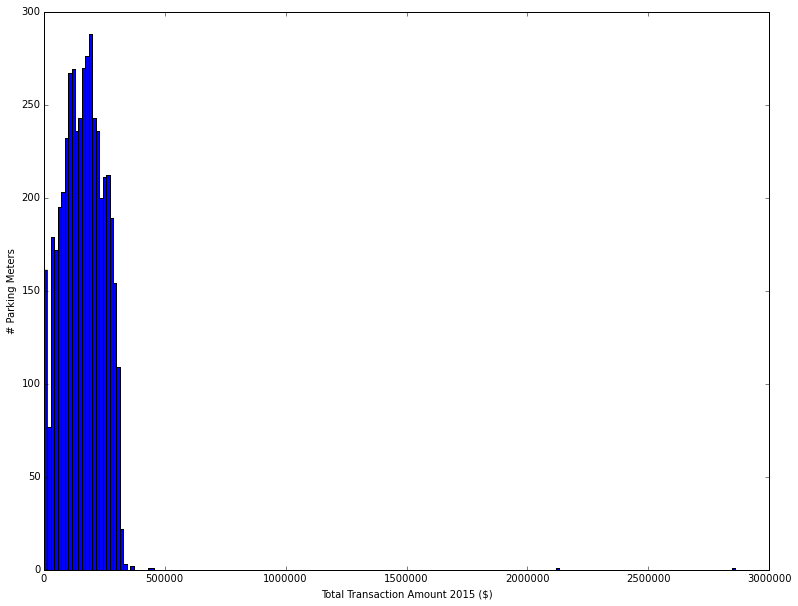

In [11]:
# plot a histogram of the total amounts from 2015 for all parking meters
plt.figure(figsize=(13, 10))
plt.hist(total_amount_list,bins=200)
plt.xlabel('Total Transaction Amount 2015 ($)')
plt.ylabel('# Parking Meters')

In [12]:
# print info for 2 big outliers and 2 not-as-bad outliers
# they're all downtown, 1 is near Horton Plaza, 2 are in the heart of downtown/FiDi, and 1 is near the waterfront
n=0
print len(total_amount_list)
print len(tract_list)
for i in total_amount_list:
    if i>400000:
        print i
        print meter.sub_area[n],meter.pole[n],trans[trans.pole_id==meter.pole[n]]
    n+=1

4653
4653
2121730
100 West F St WF-100N        pole_id meter_type month  sum_trans_amt  num_trans <- n()
49066  WF-100N         MS   Jan         175915               963
49067  WF-100N         MS   Feb         146415               800
49068  WF-100N         MS   Mar         179385              1004
49069  WF-100N         MS   Apr         142735               783
49070  WF-100N         MS   May         169020               897
49071  WF-100N         MS   Jun         148705               815
49072  WF-100N         MS   Jul         161695               869
49073  WF-100N         MS   Aug         166210               937
49074  WF-100N         MS   Sep         196065              1092
49075  WF-100N         MS   Oct         232445              1254
49076  WF-100N         MS   Nov         201890              1143
49077  WF-100N         MS   Dec         201250              1193
451755
1500 INDIA ST N-1523       pole_id meter_type month  sum_trans_amt  num_trans <- n()
39451  N-1523         S

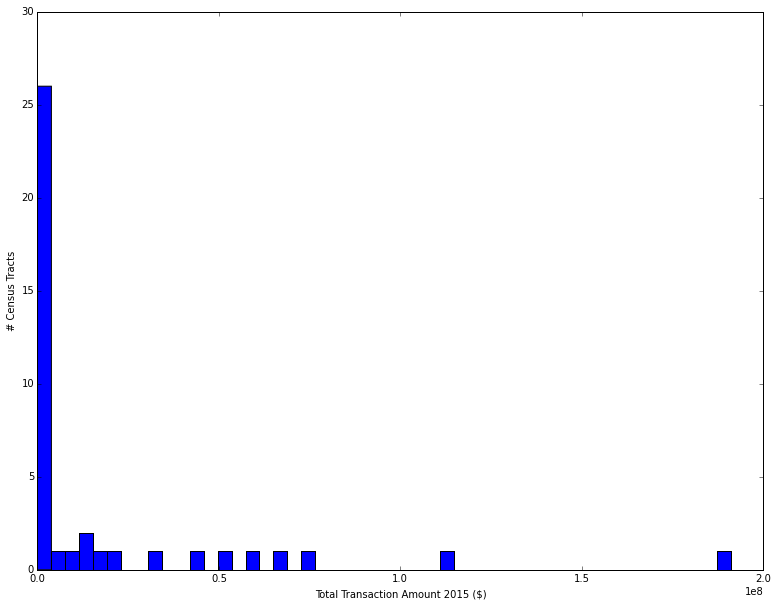

In [14]:
# plot a histogram of the total amounts from 2015 for each census tract
plt.figure(figsize=(13, 10))
plt.hist(totals_list,50)
plt.xlabel('Total Transaction Amount 2015 ($)')
plt.ylabel('# Census Tracts')

In [21]:
# look up one failure by hand: 5-207
spot = meter.pole=="5-207"
# save long/lat
print meter[spot]
lon = meter[spot].longitude
print lon
lat = meter[spot].latitude
print lat
# get census tract
address_info = cg.coordinates(x=lon,y=lat)
#print address_info
tract = str(address_info[0]['Census Tracts'][0]['TRACT'])
print tract

          zone     area       sub_area   pole  config_code  \
2017  Downtown  Gaslamp  200 Fifth Ave  5-207        13442   

                config_name   longitude   latitude  
2017  Copy of 6569 with PBP -117.160017  32.707508  
2017   -117.160017
Name: longitude, dtype: float64
2017    32.707508
Name: latitude, dtype: float64
005400
